In [1]:
import pandas as pd
from pathlib import Path
import os
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt, image as img
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import (
    Conv2D,
    Conv2DTranspose,
    MaxPool2D,
    ReLU,
    Flatten,
    Dense,
    UpSampling2D,
)
from skimage.transform import resize
from tensorflow import Tensor
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras import layers

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Input
from tensorflow import Tensor
from scipy.stats import mannwhitneyu
from tabulate import tabulate

import progressbar

# random seed generator
np.random.seed(3)
tf.random.set_seed(7)

In [4]:
def load_raw_data():
  covid = 'C:/Users/Paula/LearnAI_porject/2COVID'
  noncovid = 'C:/Users/Paula/LearnAI_porject/1NonCOVID'

  covid_images = list(Path(covid).glob("*.png"))
  non_covid_images = list(Path(noncovid).glob("*.png"))
  fig = plt.figure(figsize=(10, 10))
  fig.add_subplot(1, 2, 1)
  image = img.imread(covid_images[1])
  plt.imshow(image)
  plt.title("CT Scan of Covid Affected Lungs")

  fig.add_subplot(1, 2, 2)
  image = img.imread(non_covid_images[1])
  plt.imshow(image)
  plt.title("CT Scan of Healthy Lungs")
  return covid_images, non_covid_images

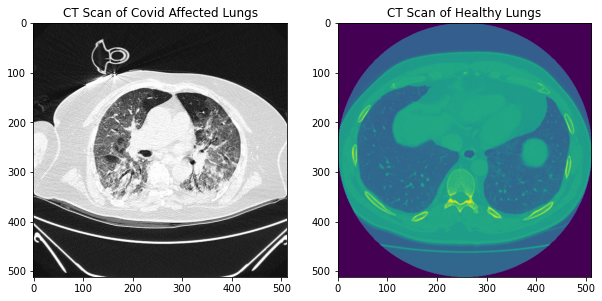

In [5]:
covid_images, non_covid_images = load_raw_data()
IMG_SIZE = 128

# Two empty numpy arrays to store coverted images
positive_npy = np.empty((len(covid_images), IMG_SIZE, IMG_SIZE, 1), dtype=np.float32)
negative_npy = np.empty((len(non_covid_images), IMG_SIZE, IMG_SIZE, 1), dtype=np.float32)

# start a bar of show percentage of loading data 
covid_bar = progressbar.ProgressBar(maxval=len(covid_images), 
                                    widgets=[progressbar.Bar('=', '[', ']'), ' ', 
                                             progressbar.Percentage()])
non_covid_bar = progressbar.ProgressBar(maxval=len(non_covid_images), 
                                        widgets=[progressbar.Bar('=', '[', ']'),
                                                 ' ', progressbar.Percentage()])

In [ ]:
# another way

In [4]:
data_dir = Path('C:/Users/Paula/LearnAI_porject/Covid_images')

In [5]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

14486


In [6]:
batch_size = 32
img_height = 180
img_width = 180

In [7]:
train_data = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 14486 files belonging to 2 classes.
Using 11589 files for training.


In [8]:
val_data = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 14486 files belonging to 2 classes.
Using 2897 files for validation.


In [10]:
class_names = train_data.class_names
print(class_names)

['1NonCOVID', '2COVID']


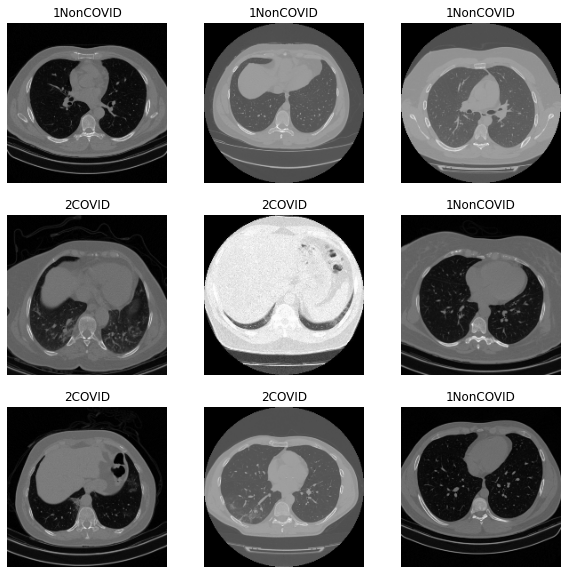

In [11]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")